In [38]:
import numpy as np
import pandas as pd

In [39]:
df = pd.read_csv("spam.csv", encoding = "latin-1")

In [40]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4792,ham,Or u ask they all if next sat can a not. If al...,NaN,NaN,NaN
2856,ham,Today i'm not workin but not free oso... Gee.....,NaN,NaN,NaN
3732,ham,Old Orchard near univ. How about you?,NaN,NaN,NaN
5487,spam,2p per min to call Germany 08448350055 from yo...,NaN,NaN,NaN
3058,ham,"Dear all, as we know &lt;#&gt; th is the &lt...",NaN,NaN,NaN


In [41]:
df.shape

(5572, 5)

# Data Cleaning 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [43]:
# drop last 3 columns

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [44]:
df.sample(5)

,v1,v2
3993,ham,I love to cuddle! I want to hold you in my str...
3818,ham,"sorry brah, just finished the last of my exams..."
876,ham,Are you in castor? You need to see something
956,ham,"Love isn't a decision, it's a feeling. If we c..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...


In [45]:
# renaming the columns for better understanding

df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.sample(5)

,target,text
1376,ham,Auntie huai juan never pick up her phone
2492,ham,No drama Pls.i have had enough from you and fa...
4178,ham,Can Ì_ send me a copy of da report?
4428,ham,Hey they r not watching movie tonight so i'll ...
1699,ham,Ok...


# Pre-processing

In [46]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [47]:
df['target']=encoder.fit_transform(df['target'])

In [48]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
# finding the missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [50]:
# check for duplicate values

df.duplicated().sum()

403

In [51]:
# remove duplicates

df=df.drop_duplicates(keep='first')

In [52]:
df.duplicated().sum()

0

In [53]:
df.shape

(5169, 2)

# Exploratory Data Analysis

In [54]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
# counting the number of spam and ham mails containing in the dataset

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

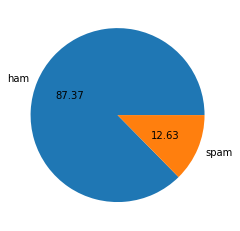

In [56]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [113]:
# Data is imbalanced
import nltk

In [114]:
!pip install nltk

In [115]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gopas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [116]:
#number of character used
df['num_characters'] = df['text'].apply(len)

In [117]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [118]:
# number of words used
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [119]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [120]:
# number of sentences used
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [121]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# Co-relation 

In [122]:
import seaborn as sns

In [123]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

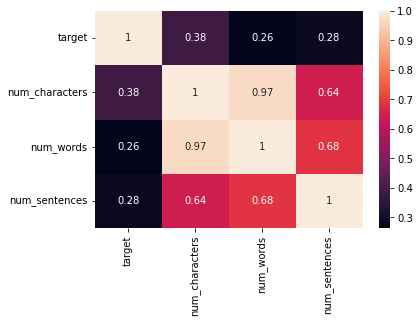

In [124]:
sns.heatmap(df.corr(),annot=True)

# Data Pre-processing


i)Lower case
ii)Tokenization
iii)Removing special characters
iv)Removing stop words and punctuation
v)Stemming

In [133]:
from nltk.corpus import stopwords


In [134]:
import string

In [135]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [136]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text: 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [137]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [138]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [140]:
df['transformed_text'] = df['text'].apply(transform_text)

In [141]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [170]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [171]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [172]:
X.shape

(5169, 3000)

In [173]:
y = df['target'].values

In [174]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [177]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [178]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [179]:
gnb.fit(X_train,y_train)
y_predict1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [180]:
mnb.fit(X_train,y_train)
y_predict2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(precision_score(y_test,y_predict2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [181]:
bnb.fit(X_train,y_train)
y_predict3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print(precision_score(y_test,y_predict3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [182]:
# we will take MNB as the best model

In [183]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
